In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


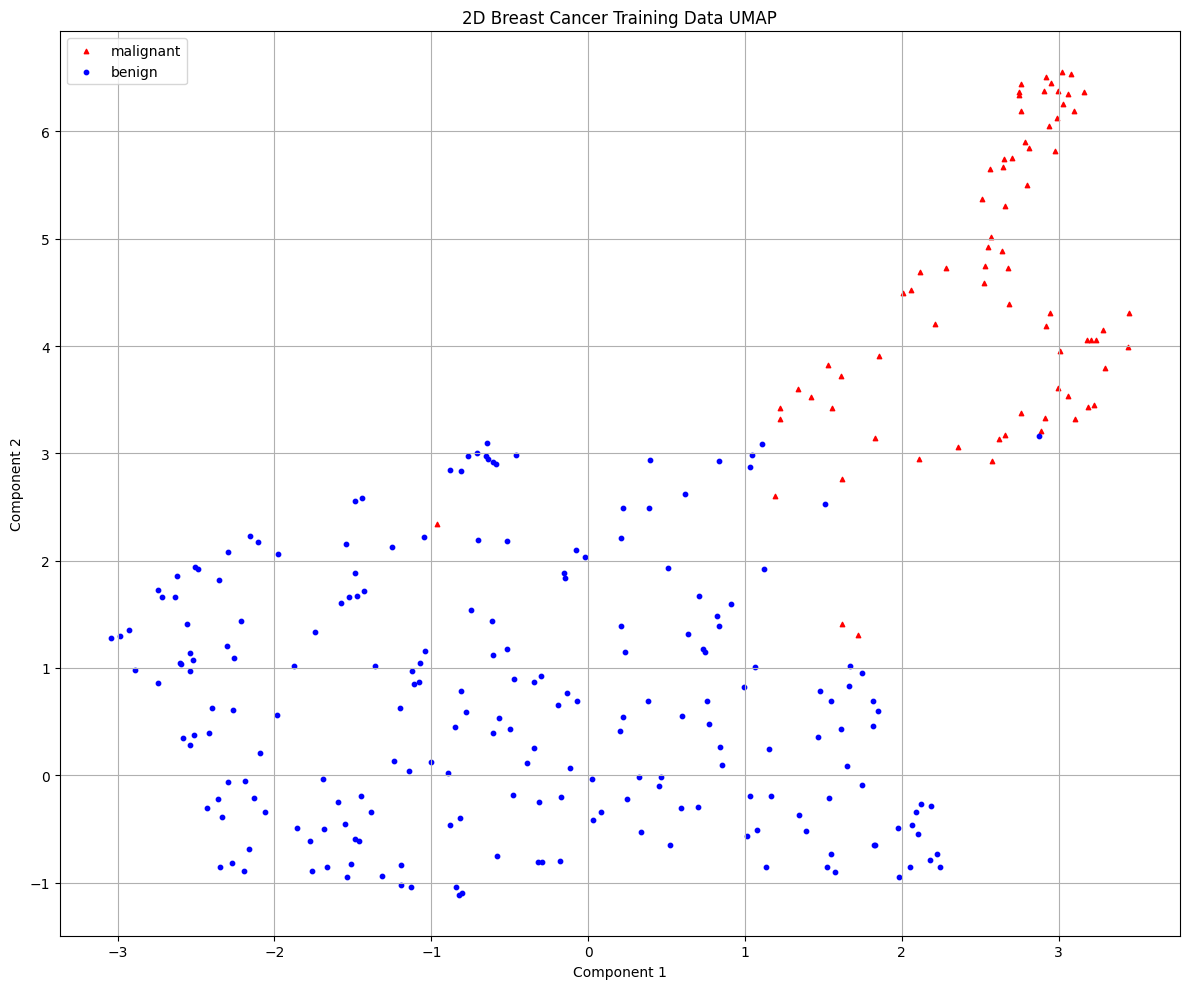

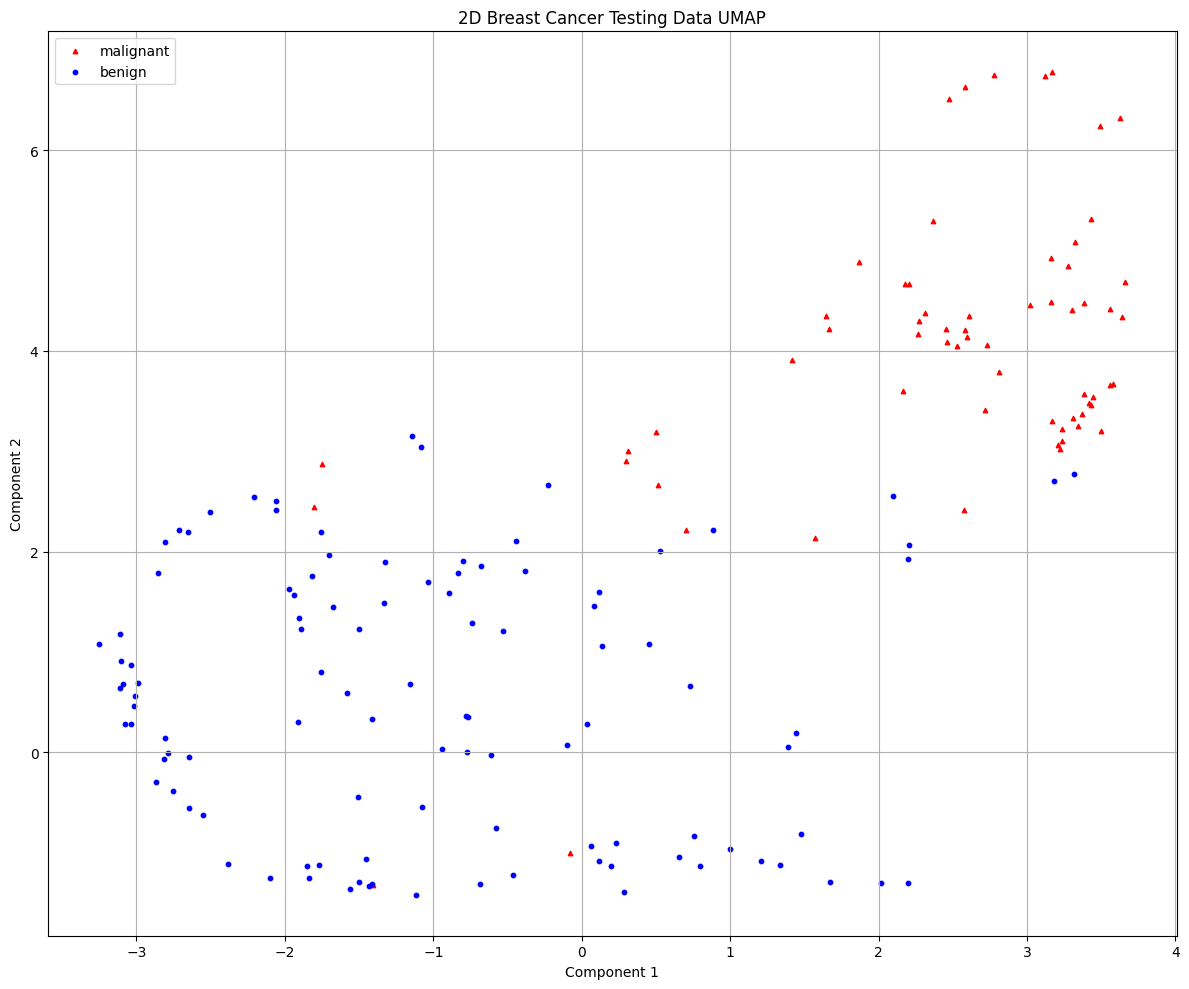

[I 2025-04-27 10:21:20,172] A new study created in memory with name: no-name-afdc9842-0b03-446c-bf2b-4ee689ffc1f8
[I 2025-04-27 10:21:22,421] Trial 0 finished with value: 0.9686025408348458 and parameters: {'n_estimators': 546, 'max_depth': 22, 'min_samples_split': 9, 'min_samples_leaf': 17}. Best is trial 0 with value: 0.9686025408348458.
[I 2025-04-27 10:21:23,181] Trial 1 finished with value: 0.9721718088324259 and parameters: {'n_estimators': 168, 'max_depth': 28, 'min_samples_split': 17, 'min_samples_leaf': 15}. Best is trial 1 with value: 0.9721718088324259.
[I 2025-04-27 10:21:25,238] Trial 2 finished with value: 0.9649727767695101 and parameters: {'n_estimators': 494, 'max_depth': 30, 'min_samples_split': 13, 'min_samples_leaf': 20}. Best is trial 1 with value: 0.9721718088324259.
[I 2025-04-27 10:21:27,659] Trial 3 finished with value: 0.9758015728977616 and parameters: {'n_estimators': 580, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 12}. Best is trial 3 wit

Best trial:
Accuracy: 0.9827586206896551
Best hyperparameters:  {'n_estimators': 330, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 2}


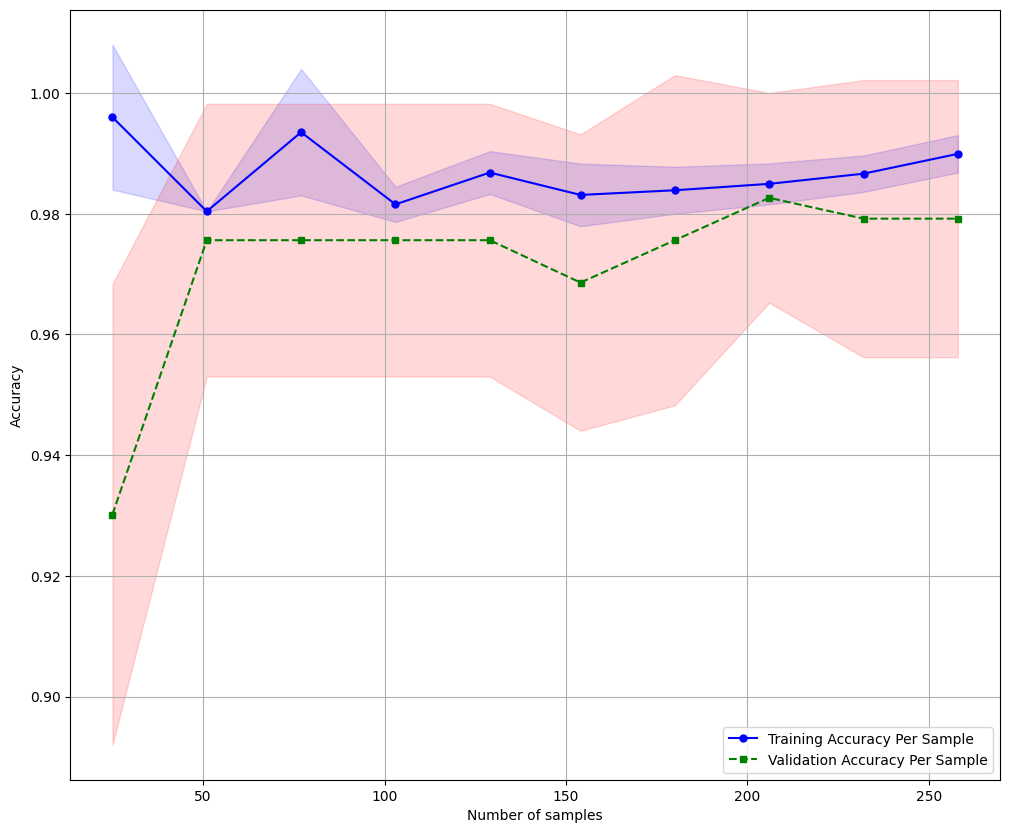

Confusion Matrix
[[ 55   9]
 [  5 102]]
Accuracy: 0.9181, Precision: 0.9189, Recall: 0.9533, F1: 0.9358, AUC: 0.9612


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'dbscan', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'umap', {})

helper.train_and_evaluate_model('rf', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)